<a href="https://colab.research.google.com/github/rainforest01-coder/ESAA_files/blob/main/ESAA_WEEK03_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#시계열 데이터

##12-1 datetime 오브젝트

datetime 라이브러리는 날짜와 시간을 처리하는 등의 다양한 기능을 제공하는 파이썬 라이브러리

* date 오브젝트:날짜 처리
* time 오브젝트: 시간 처리
* **datetime 오브젝트**: 날짜와 시간 모두 처리

In [1]:
from datetime import datetime

#now, today매서드 사용해 현재 시간 출력

now1=datetime.now()
print(now1)

now2=datetime.today()
print(now2)

2025-09-22 01:43:00.156784
2025-09-22 01:43:00.157200


datetime오브젝트 생성시 시간을 직접 입력하여 인자로 전달

In [3]:
t1=datetime.now()
t2=datetime(1970,1,1)
t3=datetime(1970,12,12,13,24,34)
print(t1)
print(t2)
print(t3)

2025-09-21 07:31:48.356245
1970-01-01 00:00:00
1970-12-12 13:24:34


datetime오브젝트 시간 계산 가능

In [4]:
diff1=t1-t2
print(diff1)
print(type(diff1))

diff2=t2-t1
print(diff2)
print(type(diff2))

20352 days, 7:31:48.356245
<class 'datetime.timedelta'>
-20353 days, 16:28:11.643755
<class 'datetime.timedelta'>


###datetime오브젝트로 변환하기-to_datetime메서드

문자열>datetime오브젝트로

In [2]:
import pandas as pd
import os

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
ebola=pd.read_csv('/content/drive/MyDrive/ESAA/week3/country_timeseries.csv')

In [15]:
ebola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 122 non-null    object 
 1   Day                  122 non-null    int64  
 2   Cases_Guinea         93 non-null     float64
 3   Cases_Liberia        83 non-null     float64
 4   Cases_SierraLeone    87 non-null     float64
 5   Cases_Nigeria        38 non-null     float64
 6   Cases_Senegal        25 non-null     float64
 7   Cases_UnitedStates   18 non-null     float64
 8   Cases_Spain          16 non-null     float64
 9   Cases_Mali           12 non-null     float64
 10  Deaths_Guinea        92 non-null     float64
 11  Deaths_Liberia       81 non-null     float64
 12  Deaths_SierraLeone   87 non-null     float64
 13  Deaths_Nigeria       38 non-null     float64
 14  Deaths_Senegal       22 non-null     float64
 15  Deaths_UnitedStates  18 non-null     flo

Date열이 문자열로 저장됨
to_datetime메서드 사용하여 변환해 새로운 열로 추가

In [22]:
ebola['date_dt']=pd.to_datetime(ebola['Date'])
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    object        
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

시간 형식 지정자 (%d,%m,%y)와 기호 (/,-) 적절히 조합하여 format인자에 전달하면 그 형식에 맞게 정리 가능

In [26]:
test_df1=pd.DataFrame({'order_day':['01/01/15','02/01/15','03/01/15']})
test_df1['date_dt1']=pd.to_datetime(test_df1['order_day'],format='%d/%m/%y')
test_df1['date_dt2']=pd.to_datetime(test_df1['order_day'],format='%m/%d/%y')
test_df1['date_df3']=pd.to_datetime(test_df1['order_day'],format='%y/%m/%d')
print(test_df1)

  order_day   date_dt1   date_dt2   date_df3
0  01/01/15 2015-01-01 2015-01-01 2001-01-15
1  02/01/15 2015-01-02 2015-02-01 2002-01-15
2  03/01/15 2015-01-03 2015-03-01 2003-01-15


In [27]:
test_df2=pd.DataFrame({'order_day':['01-01-15','02-01-15','03-01-15']})
test_df2['date_dt']=pd.to_datetime(test_df2['order_day'],format='%d-%m-%y')
print(test_df2)

  order_day    date_dt
0  01-01-15 2015-01-01
1  02-01-15 2015-01-02
2  03-01-15 2015-01-03


시간 형식 지정자
%a: 요일 %H:시간 출력 등등

시계열 데이터 구분 추추ㄹ: strftime메서드와 시간 형식 지정자 이용

In [29]:
now=datetime.now()
print(now)
nowDate=now.strftime('%y-%m-%d')
print(nowDate)
nowTime=now.strftime('%H:%M:%S')
print(nowTime)
nowDatetime=now.strftime('%Y-%m-%d %H:%M:%S')
print(nowDatetime)

2025-09-21 08:15:50.821622
25-09-21
08:15:50
2025-09-21 08:15:50


###datetime오브젝트로 변환하려는 열을 지정하여 데이터 집합 불러오기

read_csv메서드의 parse_dates인자에 datetime오브젝트로 변환하고자 하는 열의 이름을 전달하여 데이터 집합을 불러옴

In [41]:
ebola=pd.read_csv('/content/drive/MyDrive/ESAA/week3/country_timeseries.csv',parse_dates=['Date'])
ebola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    datetime64[ns]
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

###datetime오브젝트에서 날짜 정보 추출하기



In [31]:
date_series=pd.Series(['2018-05-16','2018-05-17','2018-05-18'])
d1=pd.to_datetime(date_series)
print(d1)

0   2018-05-16
1   2018-05-17
2   2018-05-18
dtype: datetime64[ns]


In [32]:
print(d1[0].year)
print(d1[0].month)
print(d1[0].day)

2018
5
16


###dt접근자 사용하기

In [36]:
#dt접근자 사용X
print(ebola['date_dt'][3].year)
print(ebola['date_dt'][3].month)
print(ebola['date_dt'][3].day)

2015
1
2


dt접근자로 date_dt열에 한번 접근한 다음 year속성을 이용하여 연도값 추출

추출된 연도값은 DF의 새로운 열로 추가

In [38]:
ebola['year']=ebola['date_dt'].dt.year
ebola[['Date','date_dt','year']].head()

,Date,date_dt,year
0,1/5/2015,2015-01-05,2015
1,1/4/2015,2015-01-04,2015
2,1/3/2015,2015-01-03,2015
3,1/2/2015,2015-01-02,2015
4,12/31/2014,2014-12-31,2014


In [40]:
ebola['month']=ebola['date_dt'].dt.month
ebola['day']=ebola['date_dt'].dt.day
ebola[['Date','date_dt','year','month','day']].head()

,Date,date_dt,year,month,day
0,1/5/2015,2015-01-05,2015,1,5
1,1/4/2015,2015-01-04,2015,1,4
2,1/3/2015,2015-01-03,2015,1,3
3,1/2/2015,2015-01-02,2015,1,2
4,12/31/2014,2014-12-31,2014,12,31


In [41]:
ebola.info() #date_dt이외에는 정수형

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    object        
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

##12-2 사례별 시계열 데이터 계산하기

최초 에볼라 발병일 계산하기
> 시간 역순이므로 데이터 프레임의 마지막부터 봐야함

In [42]:
print(ebola.iloc[-5:,:5])

          Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
117  3/27/2014    5         103.0            8.0                6.0
118  3/26/2014    4          86.0            NaN                NaN
119  3/25/2014    3          86.0            NaN                NaN
120  3/24/2014    2          86.0            NaN                NaN
121  3/22/2014    0          49.0            NaN                NaN


In [43]:
#min method이용
print(ebola['date_dt'].min())
print(type(ebola['date_dt'].min()))

2014-03-22 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


date열에서 에볼라의 최초 발병일을 빼면 에볼라의 진행 정도를 알 수 있음

In [45]:
ebola['outbreak_d']=ebola['date_dt']-ebola['date_dt'].min()
print(ebola[['Date','Day','outbreak_d']].head())

         Date  Day outbreak_d
0    1/5/2015  289   289 days
1    1/4/2015  288   288 days
2    1/3/2015  287   287 days
3    1/2/2015  286   286 days
4  12/31/2014  284   284 days


파산한 은행의 개수 계산하기
파산한 은행 데이터를 불러와 분기별로 파산한 은행이 얼마나 되는지 계산

In [48]:
banks=pd.read_csv('/content/drive/MyDrive/ESAA/week3/banklist.csv')
banks.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",26-May-17,1-Jun-17
1,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,5-May-17,1-Jun-17
2,First NBC Bank,New Orleans,LA,58302,Whitney Bank,28-Apr-17,23-May-17
3,Proficio Bank,Cottonwood Heights,UT,35495,Cache Valley Bank,3-Mar-17,18-May-17
4,Seaway Bank and Trust Company,Chicago,IL,19328,State Bank of Texas,27-Jan-17,18-May-17


In [51]:
#datetime으로 변환
banks=pd.read_csv('/content/drive/MyDrive/ESAA/week3/banklist.csv',parse_dates=[5,6])
banks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551 entries, 0 to 550
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Bank Name              551 non-null    object        
 1   City                   551 non-null    object        
 2   ST                     551 non-null    object        
 3   CERT                   551 non-null    int64         
 4   Acquiring Institution  551 non-null    object        
 5   Closing Date           551 non-null    datetime64[ns]
 6   Updated Date           551 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 30.3+ KB


/tmp/ipython-input-4084810044.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  banks=pd.read_csv('/content/drive/MyDrive/ESAA/week3/banklist.csv',parse_dates=[5,6])
/tmp/ipython-input-4084810044.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  banks=pd.read_csv('/content/drive/MyDrive/ESAA/week3/banklist.csv',parse_dates=[5,6])


In [52]:
#파산 연도와 분기를 추가:dt접근자와 quarter속성
banks['closing_quarter'], banks['closing_year']=(banks['Closing Date'].dt.quarter, banks['Closing Date'].dt.year)
banks.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date,closing_quarter,closing_year
0,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",2017-05-26,2017-06-01,2,2017
1,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,2017-05-05,2017-06-01,2,2017
2,First NBC Bank,New Orleans,LA,58302,Whitney Bank,2017-04-28,2017-05-23,2,2017
3,Proficio Bank,Cottonwood Heights,UT,35495,Cache Valley Bank,2017-03-03,2017-05-18,1,2017
4,Seaway Bank and Trust Company,Chicago,IL,19328,State Bank of Texas,2017-01-27,2017-05-18,1,2017


In [57]:
#연도별로 파산한 은행의 개수:groupby

closing_year=banks.groupby(['closing_year']).size()
print(closing_year)

closing_year
2000      2
2001      3
2002     10
2003      3
2004      4
2007      3
2008     25
2009    140
2010    157
2011     92
2012     51
2013     24
2014     18
2015      8
2016      5
2017      6
dtype: int64


In [55]:
closing_year_q=banks.groupby(['closing_year','closing_quarter']).size()
closing_year_q

closing_year  closing_quarter
2000          4                   2
2001          1                   1
              2                   1
              3                   1
2002          1                   6
              2                   1
              3                   1
              4                   2
2003          1                   1
              2                   1
              4                   1
2004          1                   3
              2                   1
2007          1                   1
              3                   1
              4                   1
2008          1                   2
              2                   2
              3                   9
              4                  12
2009          1                  21
              2                  24
              3                  50
              4                  45
2010          1                  41
              2                  45
              3                  41
              4                  30
2011          1                  26
              2                  22
              3                  26
              4                  18
2012          1                  16
              2                  15
              3                  12
              4                   8
2013          1                   4
              2                  12
              3                   6
              4                   2
2014          1                   5
              2                   7
              3                   2
              4                   4
2015          1                   4
              2                   1
              3                   1
              4                   2
2016          1                   1
              2                   2
              3                   2
2017          1                   3
              2                   3
dtype: int64

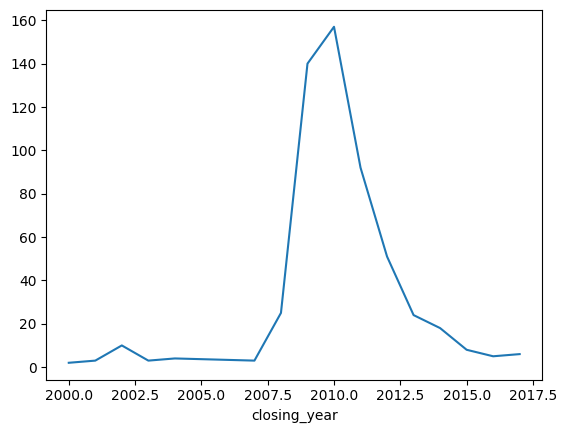

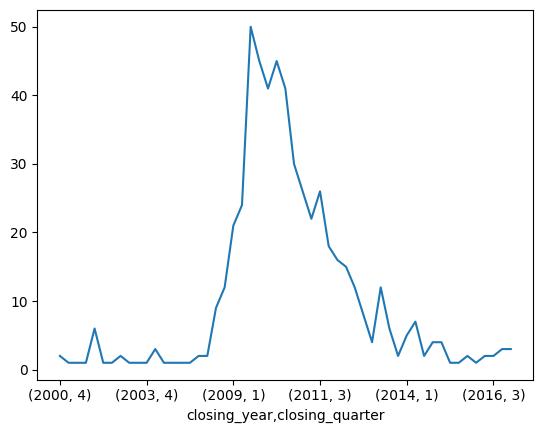

In [58]:
import matplotlib.pyplot as plt
fig, ax=plt.subplots()
ax=closing_year.plot()
plt.show()

fig,ax=plt.subplots()
ax=closing_year_q.plot()
plt.show()

테슬라 주식 데이터로 시간 계산하기

In [4]:
tesla=pd.read_csv('/content/drive/MyDrive/ESAA/week3/tesla_stock_quandl.csv',parse_dates=[0])
tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        1949 non-null   datetime64[ns]
 1   Open        1949 non-null   float64       
 2   High        1949 non-null   float64       
 3   Low         1949 non-null   float64       
 4   Close       1949 non-null   float64       
 5   Volume      1949 non-null   float64       
 6   ExDividend  1949 non-null   float64       
 7   SplitRatio  1949 non-null   float64       
 8   AdjOpen     1949 non-null   float64       
 9   AdjHigh     1949 non-null   float64       
 10  AdjLow      1949 non-null   float64       
 11  AdjClose    1949 non-null   float64       
 12  AdjVolume   1949 non-null   float64       
dtypes: datetime64[ns](1), float64(12)
memory usage: 198.1 KB


In [63]:
tesla.loc[(tesla.Date.dt.year==2010)&(tesla.Date.dt.month==6)]

,Date,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
1947,2010-06-30,25.79,30.4192,23.30,23.83,17187100.0,0.0,1.0,25.79,30.4192,23.30,23.83,17187100.0
1948,2010-06-29,19.00,25.0000,17.54,23.89,18766300.0,0.0,1.0,19.00,25.0000,17.54,23.89,18766300.0


###datetime오브젝트와 인덱스-datetimeindex

datetime오브젝트를 데이터프레임의 인덱스로 설정하면 원하는 시간의 데이터를 바로 추출할 수 있어 편리

In [6]:
tesla.index=tesla["Date"]
print(tesla.index)

DatetimeIndex(['2018-03-27', '2018-03-26', '2018-03-23', '2018-03-22',
               '2018-03-21', '2018-03-20', '2018-03-19', '2018-03-16',
               '2018-03-15', '2018-03-14',
               ...
               '2010-07-13', '2010-07-12', '2010-07-09', '2010-07-08',
               '2010-07-07', '2010-07-06', '2010-07-02', '2010-07-01',
               '2010-06-30', '2010-06-29'],
              dtype='datetime64[ns]', name='Date', length=1949, freq=None)


In [7]:
tesla.loc['2015'].iloc[:5,:5]

,Date,Open,High,Low,Close
Date,,,,,
2015-12-31,2015-12-31,238.51,243.450,238.3700,240.01
2015-12-30,2015-12-30,236.60,243.634,235.6707,238.09
2015-12-29,2015-12-29,230.06,237.720,229.5470,237.19
2015-12-28,2015-12-28,231.49,231.980,225.5400,228.95
2015-12-24,2015-12-24,230.56,231.880,228.2800,230.57


In [8]:
print(tesla.loc['2010-06'].iloc[:,:5])

                 Date   Open     High    Low  Close
Date                                               
2010-06-30 2010-06-30  25.79  30.4192  23.30  23.83
2010-06-29 2010-06-29  19.00  25.0000  17.54  23.89


###시간간격과 인덱스-Timedeltaindex

최초 5일간 수집된 데이터만 살펴보고싶다면?
시간간격을 인덱스로 지정하여 데이터 추출

In [9]:
tesla['ref_date']=tesla['Date']-tesla['Date'].min()
tesla.head()

,Date,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume,ref_date
Date,,,,,,,,,,,,,,
2018-03-27,2018-03-27,304.00,304.27,277.18,279.18,13696168.0,0.0,1.0,304.00,304.27,277.18,279.18,13696168.0,2828 days
2018-03-26,2018-03-26,307.34,307.59,291.36,304.18,8324639.0,0.0,1.0,307.34,307.59,291.36,304.18,8324639.0,2827 days
2018-03-23,2018-03-23,311.25,311.61,300.45,301.54,6600538.0,0.0,1.0,311.25,311.61,300.45,301.54,6600538.0,2824 days
2018-03-22,2018-03-22,313.89,318.82,308.18,309.10,4914307.0,0.0,1.0,313.89,318.82,308.18,309.10,4914307.0,2823 days
2018-03-21,2018-03-21,310.25,322.44,310.19,316.53,5927881.0,0.0,1.0,310.25,322.44,310.19,316.53,5927881.0,2822 days


In [10]:
tesla.index=tesla['ref_date']
tesla.iloc[:5,:5]

,Date,Open,High,Low,Close
ref_date,,,,,
2828 days,2018-03-27,304.00,304.27,277.18,279.18
2827 days,2018-03-26,307.34,307.59,291.36,304.18
2824 days,2018-03-23,311.25,311.61,300.45,301.54
2823 days,2018-03-22,313.89,318.82,308.18,309.10
2822 days,2018-03-21,310.25,322.44,310.19,316.53


In [11]:
tesla.loc['5 days':].iloc[:5,:5]

,Date,Open,High,Low,Close
ref_date,,,,,
3 days,2010-07-02,23.00,23.1000,18.71,19.20
2 days,2010-07-01,25.00,25.9200,20.27,21.96
1 days,2010-06-30,25.79,30.4192,23.30,23.83
0 days,2010-06-29,19.00,25.0000,17.54,23.89


###시간 범위와 인덱스

특정 일에 누락된 데이터도 포함시켜 데이터를 살펴보려면 임의로 시간 범위를 생성하여 인덱스로 지정

In [17]:
ebola.iloc[:5,:5] #1.1데이터 누락

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
0,2015-01-05,289,2776.0,NaN,10030.0
1,2015-01-04,288,2775.0,NaN,9780.0
2,2015-01-03,287,2769.0,8166.0,9722.0
3,2015-01-02,286,NaN,8157.0,NaN
4,2014-12-31,284,2730.0,8115.0,9633.0


In [18]:
ebola.iloc[-5:,:5]#3.23누락

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
117,2014-03-27,5,103.0,8.0,6.0
118,2014-03-26,4,86.0,NaN,NaN
119,2014-03-25,3,86.0,NaN,NaN
120,2014-03-24,2,86.0,NaN,NaN
121,2014-03-22,0,49.0,NaN,NaN


In [19]:
head_range=pd.date_range(start='2014-12-31',end='2015-01-05')
head_range

DatetimeIndex(['2014-12-31', '2015-01-01', '2015-01-02', '2015-01-03',
               '2015-01-04', '2015-01-05'],
              dtype='datetime64[ns]', freq='D')

In [21]:
ebola_5=ebola.head()
ebola_5.index=ebola_5['Date']
ebola_5.reindex(head_range)
ebola_5.iloc[:5,:5] #뭐가 달라진거지

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
Date,,,,,
2015-01-05,2015-01-05,289,2776.0,NaN,10030.0
2015-01-04,2015-01-04,288,2775.0,NaN,9780.0
2015-01-03,2015-01-03,287,2769.0,8166.0,9722.0
2015-01-02,2015-01-02,286,NaN,8157.0,NaN
2014-12-31,2014-12-31,284,2730.0,8115.0,9633.0


시간 범위의 주기ㅣ 설정하기

시간 범위를 인덱스로 지정하면 Datetimeindex자료형이 만들어지고 freq속성이 포함됨
이를 지정하면 시간 간격을 조절하여 Datetimeindex를 만들 수 있음

In [22]:
pd.date_range('2017-01-01','2017-01-07',freq='B') #평일 값만 포함

DatetimeIndex(['2017-01-02', '2017-01-03', '2017-01-04', '2017-01-05',
               '2017-01-06'],
              dtype='datetime64[ns]', freq='B')

###시간 범위 수정하고 데이터 밀어내기 -shift메서드

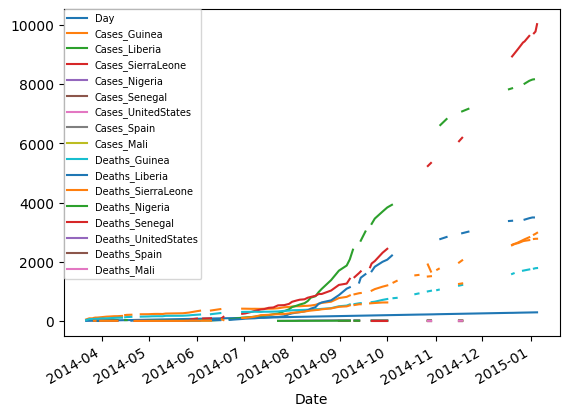

In [23]:
import matplotlib.pyplot as plt
ebola.index=ebola['Date']
fig, ax=plt.subplots()
ax=ebola.iloc[0:,1:].plot(ax=ax)
ax.legend(fontsize=7,loc=2,borderaxespad=0.)
plt.show()

나라 별로 발병일이 달라 비교 어려움
>각 나라의 발병일을 가장 처음 에볼라가 발병한 기니와 동일한 위치로 옮겨야함

In [42]:
ebola_sub=ebola[['Day','Cases_Guinea','Cases_Liberia']]
ebola_sub.tail(10)

,Day,Cases_Guinea,Cases_Liberia
112,13,143.0,18.0
113,10,127.0,8.0
114,9,122.0,8.0
115,7,112.0,7.0
116,6,112.0,3.0
117,5,103.0,8.0
118,4,86.0,NaN
119,3,86.0,NaN
120,2,86.0,NaN
121,0,49.0,NaN


그래프 그리기 위한 데이터프레임 준비

데이터 없는 2015-01-01데이터 포함해야 확산 속도 제대로 비교 가능

In [46]:
ebola.index=ebola['Date']
new_idx=pd.date_range(ebola.index.min(),ebola.index.max())

In [47]:
new_idx

DatetimeIndex(['2014-03-22', '2014-03-23', '2014-03-24', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31',
               ...
               '2014-12-27', '2014-12-28', '2014-12-29', '2014-12-30',
               '2014-12-31', '2015-01-01', '2015-01-02', '2015-01-03',
               '2015-01-04', '2015-01-05'],
              dtype='datetime64[ns]', length=290, freq='D')

In [48]:
new_idx=reversed(new_idx)

In [49]:
ebola=ebola.reindex(new_idx)
ebola.head().iloc[:,:5]

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
Date,,,,,
2015-01-05,2015-01-05,289.0,2776.0,NaN,10030.0
2015-01-04,2015-01-04,288.0,2775.0,NaN,9780.0
2015-01-03,2015-01-03,287.0,2769.0,8166.0,9722.0
2015-01-02,2015-01-02,286.0,NaN,8157.0,NaN
2015-01-01,NaT,NaN,NaN,NaN,NaN


In [50]:
ebola.tail().iloc[:,:5]

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
Date,,,,,
2014-03-26,2014-03-26,4.0,86.0,NaN,NaN
2014-03-25,2014-03-25,3.0,86.0,NaN,NaN
2014-03-24,2014-03-24,2.0,86.0,NaN,NaN
2014-03-23,NaT,NaN,NaN,NaN,NaN
2014-03-22,2014-03-22,0.0,49.0,NaN,NaN


각 나라의 에볼라 발병일 옮기기: last_valid_index, first_valid_index메서드 사용
유효한 값이 있는 첫번째, 마지막 인덱스 반환

In [51]:
last_valid=ebola.apply(pd.Series.last_valid_index)
last_valid

,0
Date,2014-03-22
Day,2014-03-22
Cases_Guinea,2014-03-22
Cases_Liberia,2014-03-27
Cases_SierraLeone,2014-03-27
Cases_Nigeria,2014-07-23
Cases_Senegal,2014-08-31
Cases_UnitedStates,2014-10-01
Cases_Spain,2014-10-08
Cases_Mali,2014-10-22


In [52]:
first_valid=ebola.apply(pd.Series.first_valid_index)
first_valid

,0
Date,2015-01-05
Day,2015-01-05
Cases_Guinea,2015-01-05
Cases_Liberia,2015-01-03
Cases_SierraLeone,2015-01-05
Cases_Nigeria,2014-12-07
Cases_Senegal,2014-12-07
Cases_UnitedStates,2014-12-07
Cases_Spain,2014-12-07
Cases_Mali,2014-12-07


처음 발병한 날에서 각 나라의 발병일을 뺀 만큼 옮기기

In [53]:
earliest_date=ebola.index.min()
earliest_date

Timestamp('2014-03-22 00:00:00')

In [54]:
shift_values=last_valid-earliest_date
shift_values

,0
Date,0 days
Day,0 days
Cases_Guinea,0 days
Cases_Liberia,5 days
Cases_SierraLeone,5 days
Cases_Nigeria,123 days
Cases_Senegal,162 days
Cases_UnitedStates,193 days
Cases_Spain,200 days
Cases_Mali,214 days


각 나라의 에볼라 발병일 옮기기

In [55]:
ebola_dict={}
for idx, col in enumerate(ebola):
  d=shift_values[idx].days
  shifted=ebola[col].shift(d)
  ebola_dict[col]=shifted


/tmp/ipython-input-3297111663.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  d=shift_values[idx].days


In [56]:
ebola_shift=pd.DataFrame(ebola_dict)

In [57]:
ebola_shift.tail()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
Date,,,,,,,,,,,,,,,,,,
2014-03-26,2014-03-26,4.0,86.0,8.0,2.0,1.0,NaN,1.0,1.0,NaN,62.0,4.0,2.0,1.0,NaN,0.0,1.0,NaN
2014-03-25,2014-03-25,3.0,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-03-24,2014-03-24,2.0,86.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,59.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
2014-03-23,NaT,NaN,NaN,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,2.0,NaN,NaN,NaN,NaN,NaN
2014-03-22,2014-03-22,0.0,49.0,8.0,6.0,0.0,1.0,1.0,1.0,1.0,29.0,6.0,5.0,0.0,0.0,0.0,1.0,1.0


In [58]:
ebola_shift.index=ebola_shift['Day']
ebola_shift=ebola_shift.drop(['Date','Day'],axis=1)
ebola_shift.tail()

,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
Day,,,,,,,,,,,,,,,,
4.0,86.0,8.0,2.0,1.0,NaN,1.0,1.0,NaN,62.0,4.0,2.0,1.0,NaN,0.0,1.0,NaN
3.0,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.0,86.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,59.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,2.0,NaN,NaN,NaN,NaN,NaN
0.0,49.0,8.0,6.0,0.0,1.0,1.0,1.0,1.0,29.0,6.0,5.0,0.0,0.0,0.0,1.0,1.0


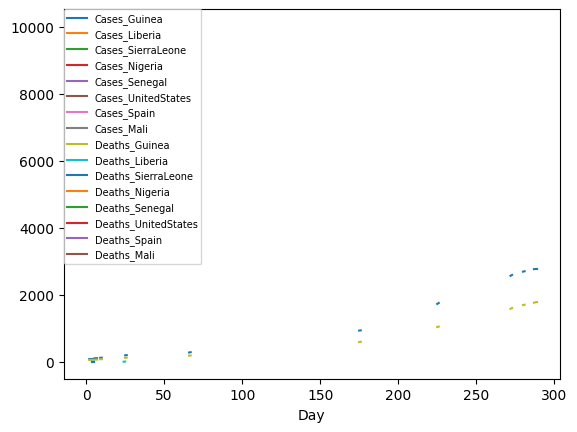

In [59]:
fig, ax=plt.subplots()
ax=ebola_shift.iloc[:,:].plot(ax=ax)
ax.legend(fontsize=7,loc=2,borderaxespad=0.)
plt.show()